In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Projects/Data/KNN_Python_CSVtopic_.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.shape

(768, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb082682b10>,
      dtype=object)

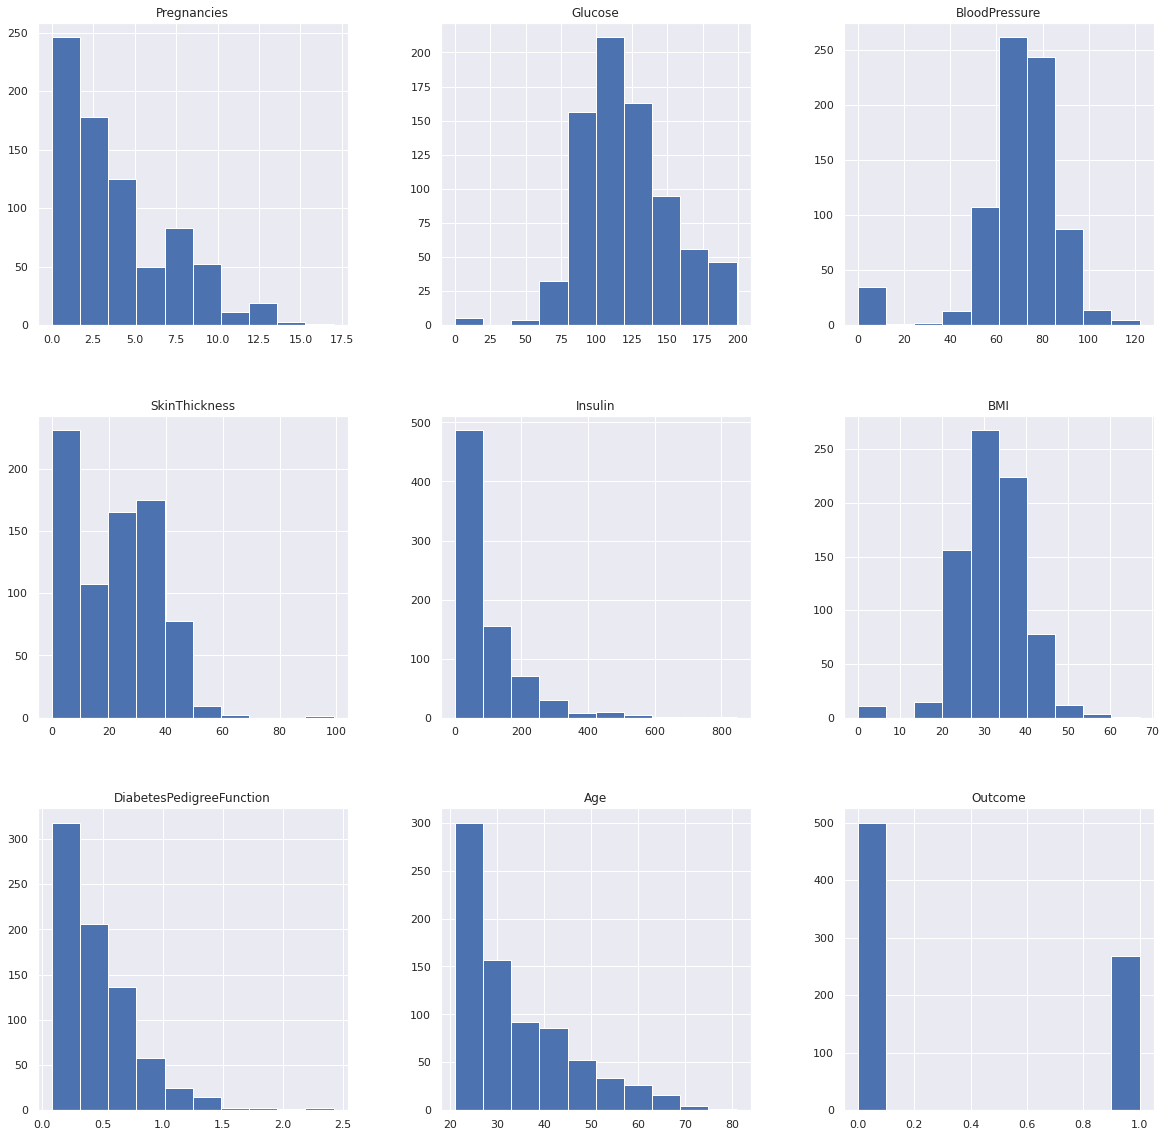

In [ ]:
df.hist(figsize = (20,20))

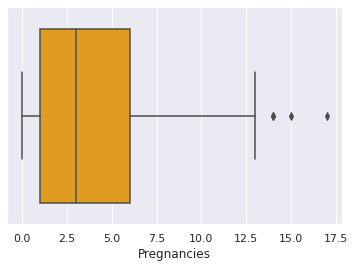

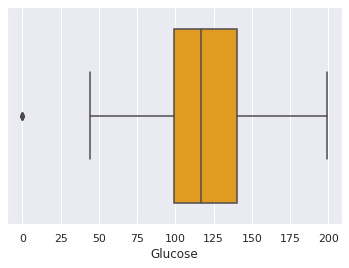

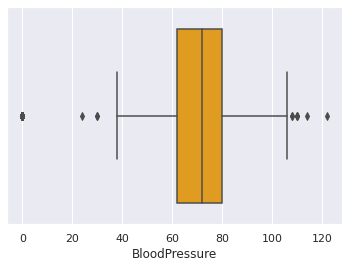

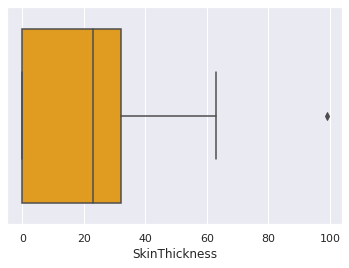

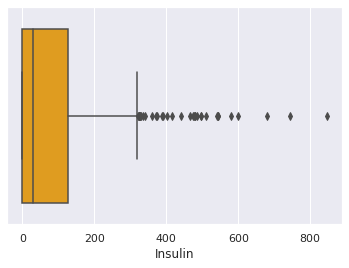

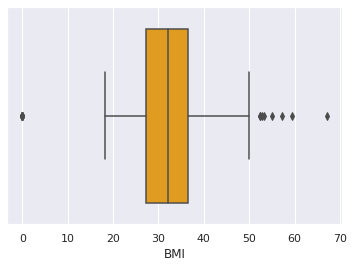

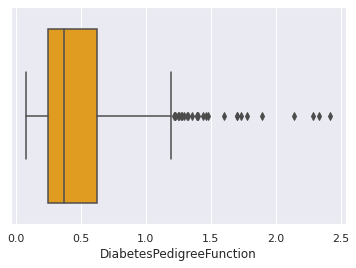

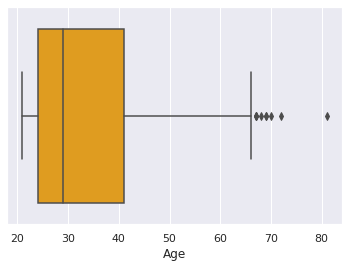

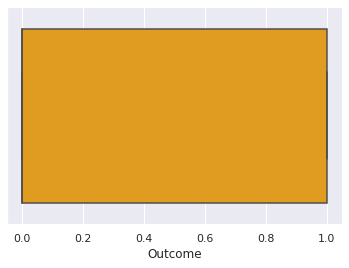

In [ ]:
for i in df.columns:
  sns.boxplot(df[i],color='orange')
  plt.show()

Outliers removal

In [ ]:
ol=[]
for i in df.columns:
  if i!='Outcome':
    q1,q3=np.percentile(df[i],(25,75))
    iqr=q3-q1
    lr=q1-1.5*iqr
    ur=q3+1.5*iqr
    ol.extend(df[(df[i]<lr) | (df[i]>ur)].index)

In [ ]:
ol=tuple(ol)
print('Total outliers:',len(ol))

Total outliers: 146


In [ ]:
ol=list(ol)

In [ ]:
df1=df.drop(ol)
df1.shape

(639, 9)

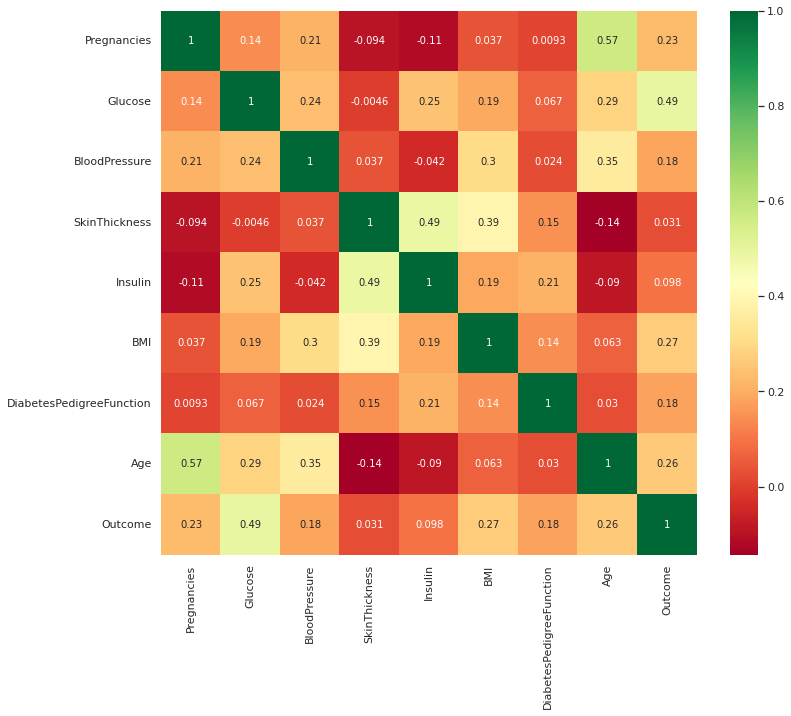

In [ ]:
plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(df1.corr(), annot=True,cmap ='RdYlGn')  # seaborn has very simple solution for heatmap

Seperating Target and feature Data

In [ ]:
x = df1.drop(["Outcome"],axis=1)
y = df1.Outcome

Scalling

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ft=ss.fit_transform(x)
x_sc=pd.DataFrame(ft,columns=x.columns)
x_sc

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.673824,0.991351,-0.010626,0.941847,-0.829247,0.247974,0.788892,1.561132
1,-0.860651,-1.170674,-0.539736,0.550406,-0.829247,-0.840853,-0.311759,-0.154912
2,1.287615,2.192476,-0.716106,-1.341558,-0.829247,-1.354158,0.968346,-0.064594
3,-0.860651,-1.033403,-0.539736,0.158965,0.353035,-0.607533,-1.045526,-1.058093
4,0.366929,-0.106820,0.165744,-1.341558,-0.829247,-0.996400,-0.909939,-0.245230
...,...,...,...,...,...,...,...,...
634,1.901405,-0.621588,0.342113,1.789969,1.434699,0.139091,-1.029575,2.735268
635,-0.553756,0.099087,-0.186996,0.419926,-0.829247,0.745724,-0.355625,-0.516184
636,0.366929,0.064769,-0.010626,0.158965,0.579430,-0.903072,-0.734473,-0.245230
637,-0.860651,0.236358,-1.068846,-1.341558,-0.829247,-0.296440,-0.319735,1.290178


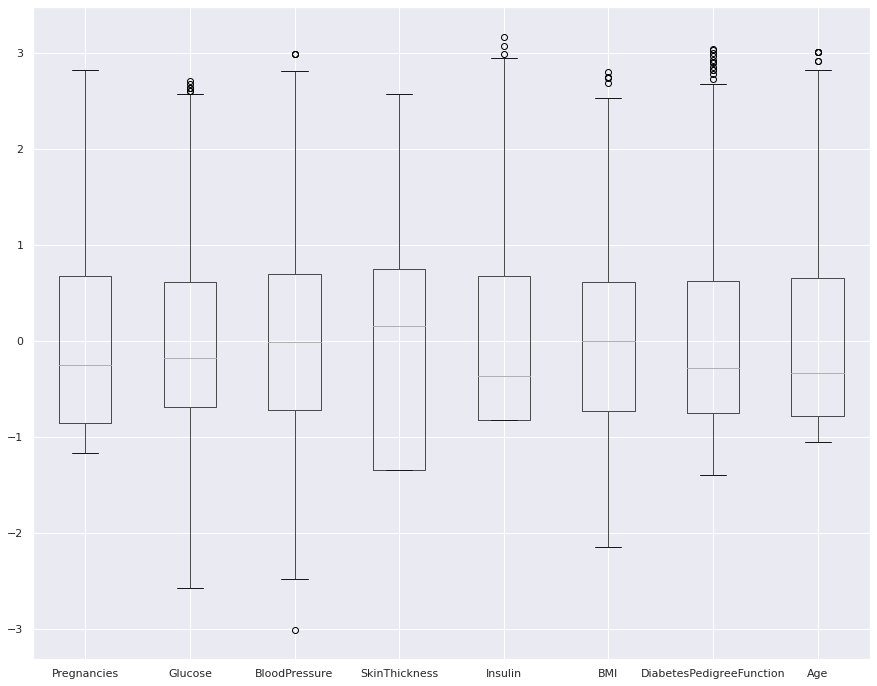

In [ ]:
x_sc.boxplot(figsize=(15,12))

In [ ]:
#importing train_test_split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_sc,y,test_size=0.2,random_state=42 )

# Model Building

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

In [ ]:
models=[LogisticRegression,SVC,RandomForestClassifier,DecisionTreeClassifier,GaussianNB]
for model in models:
  mod=model()
  mod.fit(x_train,y_train)
  print(mod,cross_val_score(mod,x,y,cv=10).mean())

LogisticRegression() 0.7810019841269841
SVC() 0.7715277777777778
RandomForestClassifier() 0.782514880952381
DecisionTreeClassifier() 0.6902777777777778
GaussianNB() 0.7653521825396825


# model is overfit

In [ ]:
model = KNeighborsClassifier(5)
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.8046875

# Try different N

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,15):

    model = KNeighborsClassifier(i)
    model.fit(x_train,y_train)
    
    train_scores.append(model.score(x_train,y_train))
    test_scores.append(model.score(x_test,y_test))

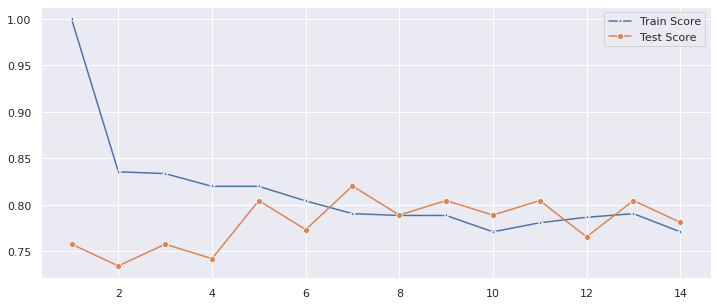

In [ ]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,15),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,15),test_scores,marker='o',label='Test Score')

In [ ]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(5)

knn.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
knn.score(x_train,y_train)

0.8199608610567515

In [ ]:
knn.score(x_test,y_test)

0.8046875

In [ ]:
y_pred = knn.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score , confusion_matrix

In [ ]:
confusion_matrix(y_test,y_pred)


array([[84,  8],
       [17, 19]])

In [ ]:
accuracy_score(y_test,y_pred)

0.8046875